# **Difference array**

Difference arrays are not super common, but it's good to have them under your belt because it would be difficult to derive the idea on the spot in an interview.

Difference arrays are used when you have a problem involving intervals of events. You can think of the events all occuring along a number line. This number line can represent time or position. Events happen on this number line, with a starting and ending point.

The input will either provide a 2D array, where each inner array is in the format [left, right, value], or some equivalent form. The story behind the problem will usually be something along the lines of "between left and right, there is value of something". Let's look at some examples.


Example 1: 1094. Car Pooling

A car has room for capacity passengers, and is given an array trips. Each trip is represented by [numPassengers, from, to], which indicates that at from, it picks up numPassengers, then drops them off at to. Can it complete all the trips without holding more passengers than capacity at any time?

In this problem, the number line is a road. Each trip is an event and appears on the number line at location from and leaves the number line at location to. During the event, numPassengers occupy the car. Regarding the input format we mentioned above, we have from as left, to as right, and numPassengers as value.

What we can do is build the number line with an array. First, we need to find the maximum value of to, let's call it farthest. Then, we can initialize the road as an array arr with length farthest + 1.

Now, for each event, we know that numPassengers enter the car at location from. So we can perform arr[from] += numPassengers. At location to, numPassengers will leave the car, so we can perform arr[to] -= numPassengers.

After processing all events, the values of arr will indicate the change in passengers at each position. Now, we can just do a simple prefix sum on the road and check if at any point the number of passengers (the prefix sum) exceeds capacity.

In [ ]:
def carPooling(trips, capacity):
    arr = [0] * (max(trip[2] for trip in trips)+1)
    for (value, left, right) in trips:
        arr[left] += value
        arr[right] -= value
    cur = 0
    for i in range(len(arr)):
        curr += arr[i]
        if curr > capacity:
            return False
    return True

We said above that the input format should be [left, right, value], or an equivalent form. What is meant by equivalent form?

Example 2: You are on a street with street lights, represented by an array lights. Each light is given as [position, radius], which means that the light is located at position, and shines to the left and right at a distance of radius. Let's say the brightest spot on the street is the spot where the most lights are shining. Return any such position.

Note that the street is extremely long - position <= 10^18.

Here is an example of an equivalent form. The problem doesn't mention the lights having different brightnesses, so value = 1 for all lights. left can be calculated as position - radius, and right can be calculated as position + radius.

Since the problem mentions that the street is very long, it would be too expensive to use the same method as in the first example where we "build" the street and then walk along it. What we can do instead is build an array change where each element is [position, value], indicating that the brightness changes by value at position. The logic here is identical to the original method - when we enter a light's coverage left, the brightness increases by value. When we exit a light's coverage right, the brightness decreases by value. Then, we can sort the array and walk over it with a prefix sum.

In [ ]:
def find_brightest_position(lights):
    change = []
    for position, radius in lights:
        change.append([position-radius, 1])
        change.append([position + radius + 1, -1])
    change.sort()
    ans = curr = brightest = 0
    for p, v in change:
        curr += v
        if curr > brightest:
            brightest = curr
            ans = position

    return ans 

# **Dijkstra's**

We have looked at many graph problems so far in this course. In those problems, we were usually dealing with unweighted graphs. When we used BFS to find the "shortest" path, we were finding the path with the least number of edges.

A weighted graph is one where the edges are assigned some value (weight). Take the following graph as an example.

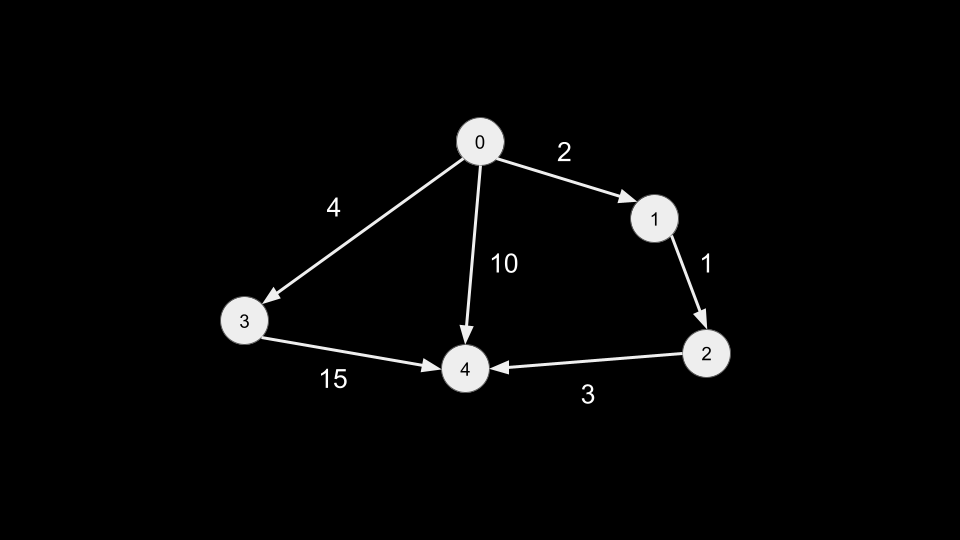

If we were to start at node 0 and wanted to find the shortest path to node 4, what would the answer be? There are 3 different paths:

0 -> 1 -> 2 -> 4

0 -> 3 -> 4

0 -> 4

Path 3 has the fewest number of edges, but is it the "shortest" path? We define the weight of a path as the sum of the edge weights. The weight of each path is:

6

19

10

As you can see, path 1 (which has the most edges) has the lowest weight. Typically, when we talk about "shortest" paths on weighted graphs, we are concerned with the path weights.

    Like many graph problems, there will likely be a story behind the problem that you will need to recognize. For example, each node is a city, each edge is a highway that has a toll you need to pay to use, and you want to find the path from one city to another with the lowest price.

We learned that BFS is a great algorithm for finding shortest paths - but BFS only works on unweighted graphs. Unweighted graphs can be thought of as weighted graphs where all weights are 1. Weighted graphs are tricky because when a path has fewer edges, it does not necessarily mean it has a lower weight. We cannot apply the BFS we are used to on weighted graphs.

**Dijkstra's algorithm**

There are many algorithms that can be used to find shortest paths in weighted graphs. Perhaps the most prominent, efficient, and easy-to-implement one is Dijkstra's algorithm.

Dijkstra's algorithm focuses on one source node, and will find the shortest distance to every other node in the graph from the source.

The idea behind Dijkstra's algorithm is to use a min-heap to store nodes, like how we used stacks in DFS and queues in BFS. With each node, we will also keep track of the weight of the path used to reach the node from the source. The min-heap will judge each element according to this weight. At each iteration, we retrieve a node by popping from the min-heap, which provides us the node with the minimum weight path.

We also keep the minimum distance so far from the source for every node. If our nodes are numbered from 0 to n - 1, it's convenient to use an array distances of length n to do this. Initially, we will have all values in this array as a large value (like infinity), except for the source which will have a value of 0.

At each node, we iterate over the neighbors. Consider the current distance from the source (which we store with each node in the heap) as curr_dist. For a given neighbor nei, consider the weight of the edge node -> nei as weight. Traversing to this neighbor would result in a path weight of dist = curr_dist + weight. There are two possibilities:

1. dist >= distances[nei]. In this case, we already found a path with a shorter distance earlier, and thus traversing to nei on the current path is pointless.
2. dist < distances[nei]. Traversing to nei on the current path is the shortest path we have seen so far to nei. We should update distances[nei] = dist and push (dist, nei) onto the heap.

**Implementation**

The following annotated pseudocode implements Dijkstra's algorithm.


    // array of length n with large values
    distances = [infinity] * n
    distances[source] = 0

    // min heap
    heap = [(0, source)]

    while (heap not empty) {
        curr_dist, node = heap.pop()
        if (curr_dist > distances[node]) {
            // optimization step: ignore current path if we found a better one
            continue;
        }

        for (nei, weight: [edges from node]) {
            dist = currDist + weight

            // add neighbor to heap if it creates a shorter path
            if (dist < distances[nei]) {
                distances[nei] = dist
                heap.push((dist, nei))
            }
        }
    }

Like in an iterative DFS with a stack or a BFS with a queue, we store nodes to traverse in the heap. We use distances to keep track of the shortest distance to each node we have found so far and continuously try to improve on each node.

Example: 743. Network Delay Time

You are given a network of n nodes, labeled from 1 to n. You are also given times, a list of travel times as directed edges. Each element in times is of the format [u, v, w], indicating that it takes w time for a signal to go from u to v.

You are also given an integer k. We will send a signal from node k. Return the minimum time it takes for every node to receive the signal. If it's impossible for all nodes to receive the signal, return -1.

Here, we have a graph given as an array of edges, with each edge having an additional integer representing the weight of the edge. We can create a graph data structure as we did throughout the course, with each edge also having the weight associated with the neighbor.

The answer to the problem can be found by finding the shortest path from k to every other node and then taking the maximum of these times. Dijkstra's algorithm is perfect for finding the shortest path from k to all other nodes. We can simply run Dijkstra's from k, then return the maximum value in distances. If the maximum value in distances is the initial large value (like infinity), it indicates a node is unreachable from the source, and thus we should return -1.

In [4]:
from collections import defaultdict
import heapq

def networkDelayTime(times, n, k):
    graph = defaultdict(list)
    for x, y, z in times:
        graph[x-1].append([y-1, z])

    distance = [float('inf')] * n
    distance[k-1] = 0
    heap = [(0, k-1)]

    while heap:
        curr_dist, node = heapq.heappop(heap)
        if curr_dist > distance[node]:
            continue
        for nei, weight in graph[node]:
            dist = curr_dist + weight
            if dist < distance[nei]:
                distance[nei] = dist
                heapq.heappush(heap, (dist, nei))
                
    ans = max(distance)
    return ans if ans < float('inf') else -1



# Be careful!

Dijkstra's should only be used on graphs without negative weight cycles. If there are negative weight cycles, then the algorithm might not run as expected. Take the following graph as an example:

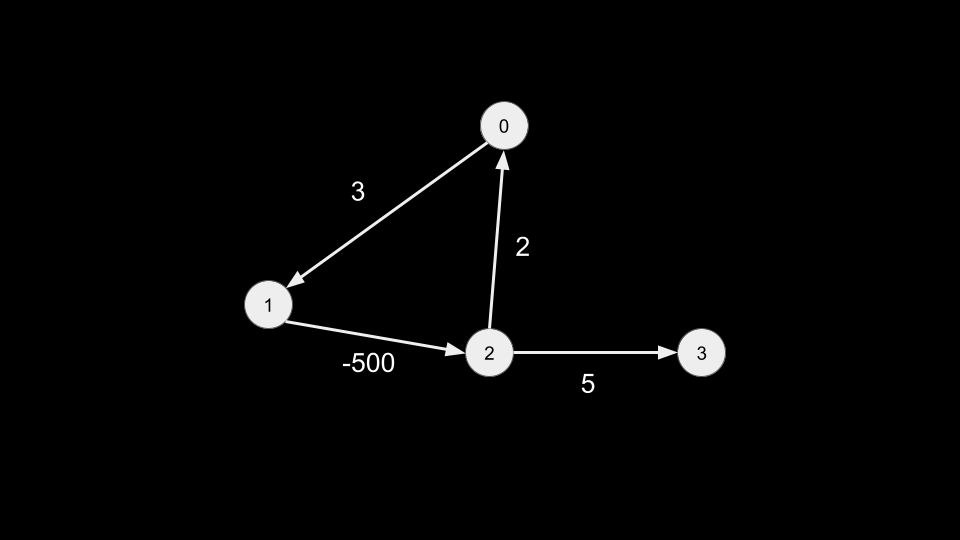

If you tried to run Dijkstra's on this graph with 0 as the source, the code would never terminate! This is because there is a cycle with a negative weight: the cycle 0 -> 1 -> 2 has a weight of -495. The first time we reach node 2, we would have curr_dist = -497. Thus, we would visit 0 again and update distances[0] = -495. The next time we visit 2, we will have curr_dist = -992. Every time we go through the cycle, the path's distance decreases, and the code will never stop running.